# Laboratorio 05: Cálculo Numérico.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Jose Nicolas Rodriguez Montoya
*Métodos computacionales 2025-I*

---

# 1.

En un cirtcuito con un voltaje de  $\varepsilon(t)$ y una inductancia de $L$, la primera ley de Kirchhoff nos da la siguiente relación

$$
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
$$

donde $R$, es la resistencia del ciruito, $I$ es la corriente. Suponga que medimos la corriente con varios valores de $t$ y obtenemos:

```
t = np.array([1.00, 1.01, 1.02, 1.03, 1.04])  # tiempo
i = np.array([3.10, 3.12, 3.14, 3.18, 3.24])  # corriente
```


donde $t$ se mide en segundos, $I$ se da en Amperios, la inductancia $L= 0.98$ H y la resistencia es de 0.142 $\Omega$. Aproxime el votaje  $\varepsilon(t)$ en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 ,  para ello realice lo siguiente:


- Construya un data frame de pandas con los valores de tiempo y corriente
- Emplee el metodo de diferencias finitas y de tres puntos para calcular la derivada numérica.
- Ahora, encuentre un polinomio de interpolación usando alguno de los métodos vistos y calcule la derivada 'exacta'. Compare sus resultados.

In [ ]:
import numpy as np
from scipy.interpolate import CubicSpline
import pandas as pd
import matplotlib.pyplot as plt

t = np.array([1.00, 1.01, 1.02, 1.03, 1.04])  # tiempo
i = np.array([3.10, 3.12, 3.14, 3.18, 3.24])  # corriente

#constantes del circuito
L = 0.98 #Henrios
R = 0.142 # Ohmios

# Creamos el DataFrame
df = pd.DataFrame({'Tiempo (s)': t, 'Corriente (A)': i})
df


,Tiempo (s),Corriente (A)
0,1.00,3.10
1,1.01,3.12
2,1.02,3.14
3,1.03,3.18
4,1.04,3.24


In [ ]:
# Construimos nuestra funcion de diferencias finitas

# Calculamos la derivada di/dt usando diferencias finitas de tres puntos
h = t[1] - t[0]  # paso de tiempo (0.01 s)
di_dt = np.zeros_like(t)

# Puntos interiores (fórmula centrada)
for n in range(1, len(t)-1):
    di_dt[n] = (i[n+1] - i[n-1]) / (2*h)

# Puntos extremos (fórmulas hacia adelante y hacia atrás)
di_dt[0] = (-3*i[0] + 4*i[1] - i[2]) / (2*h)  # hacia adelante
di_dt[-1] = (3*i[-1] - 4*i[-2] + i[-3]) / (2*h)  # hacia atrás

df['di/dt (dif finitas)'] = di_dt

df

# Crear spline cúbico
cs = CubicSpline(t, i)

# Derivada del spline (exacta para el polinomio)
di_dt_spline = cs(t, 1)  # El argumento 1 indica primera derivada

df['di/dt (spline)'] = di_dt_spline

df

,Tiempo (s),Corriente (A),di/dt (dif finitas),di/dt (spline)
0,1.00,3.10,2.0,2.833333
1,1.01,3.12,2.0,1.583333
2,1.02,3.14,3.0,2.833333
3,1.03,3.18,5.0,5.083333
4,1.04,3.24,7.0,6.833333


# 2.
Utilizando los siguientes datos de tiempo y distancia:

```
t = np.array([0, 3, 5, 8, 10, 13])  # Tiempo en s
x = np.array([0, 225, 383, 623, 742, 993])  # Distancia recorrida en m
```

- Determinar la velocidad instantanea para cada uno de los tiempos y distancias mostrados.

- ¿Cuál será la velocidad para $t=12$?




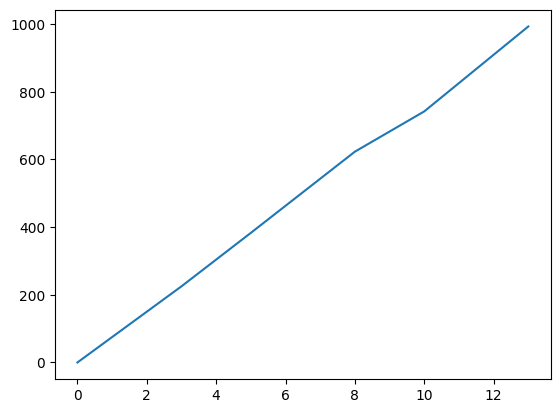

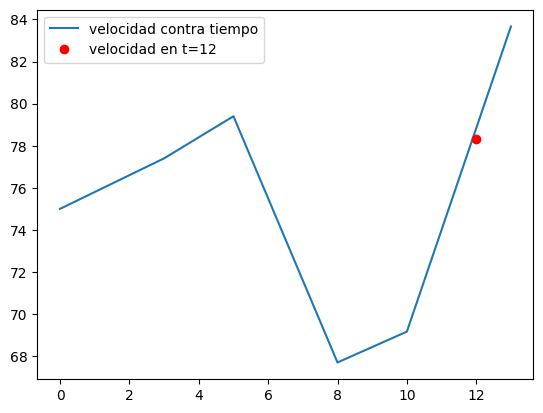

array(78.29663504)

In [ ]:
from scipy.interpolate import interp1d

t = np.array([0, 3, 5, 8, 10, 13])  # Tiempo en s
x = np.array([0, 225, 383, 623, 742, 993])  # Distancia recorrida en m

v = np.gradient(x, t)
v
#extrapolamos la velocidad
V = interp1d(t, v, kind='cubic')

plt.plot(t, x, label = 'posicion contra tiempo')
plt.show()
plt.plot(t, v, label = 'velocidad contra tiempo')
plt.plot(12, V(12), 'ro', label = 'velocidad en t=12')
plt.legend()
plt.show()

V(12)

# 3.
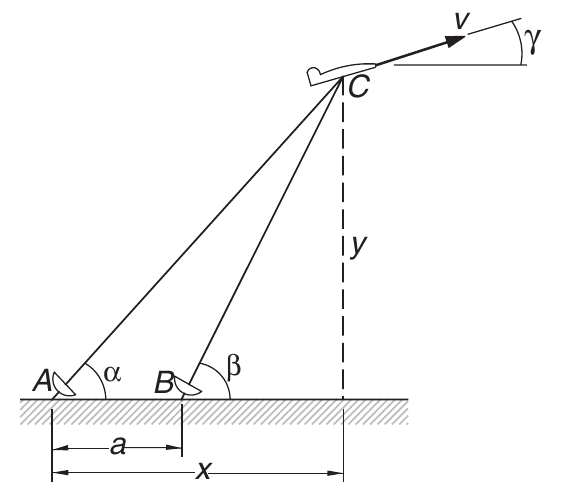


Las estaciones de radar $A$ y $B$, separadas por una distancia $a = 500 \, \text{m}$, rastrean un avión $C$ registrando los ángulos $\alpha$ y $\beta$ en intervalos de 1 segundo. Tres lecturas sucesivas son


```
data = {
    't (s)': [9, 10, 11],
    'alpha (°)': [54.80, 54.06, 53.34],
    'beta (°)': [65.59, 64.59, 63.62]
}

df = pd.DataFrame(data)
```

Calcular la velocidad $v$ del avión y el ángulo de ascenso $\gamma$ en $t = 10 \, \text{s}$. Las coordenadas del avión pueden expresarse como:

$$
x = a \frac{\tan \beta}{\tan \beta - \tan \alpha}
$$

$$
y = a \frac{\tan \alpha \tan \beta}{\tan \beta - \tan \alpha}
$$

In [ ]:
data = {
    't (s)': [9, 10, 11],
    'alpha (°)': [54.80, 54.06, 53.34],
    'beta (°)': [65.59, 64.59, 63.62]
}

df = pd.DataFrame(data)

a = 500 # distancia entre las antenas en metros

def calcular_coordenadas(alpha, beta):
  alpha_rad = np.radians(alpha)
  beta_rad = np.radians(beta)
  tan_alpha = np.tan(alpha_rad)
  tan_beta = np.tan(beta_rad)

  x = a * (tan_beta / (tan_beta - tan_alpha))
  y = a * (tan_alpha * tan_beta / (tan_beta - tan_alpha))

  return x, y

# Encontramos las coordenadas para cada tiempo

coordenadas = []
for i in range(len(df)):
  alpha = df['alpha (°)'][i]
  beta = df['beta (°)'][i]
  x, y = calcular_coordenadas(alpha, beta)
  coordenadas.append((x, y))

# pasamos al data frame
df['x (m)'] = [coord[0] for coord in coordenadas]
df['y (m)'] = [coord[1] for coord in coordenadas]

#Encontremos las velocidades en x y en y

vx = np.gradient(df['x (m)'], df['t (s)'])
vy = np.gradient(df['y (m)'], df['t (s)'])
#añadimos al Df
df['vx (m/s)'] = vx
df['vy (m/s)'] = vy

# Encontramos la velocidad del avión

v = np.sqrt(vx**2 + vy**2)
v
df['velocidad'] = v

#miremos el angulo de ascencion
gamma = np.degrees(np.arctan2(vy, vx))

df['γ'] =  gamma

df

,t (s),alpha (°),beta (°),x (m),y (m),vx (m/s),vy (m/s),velocidad,γ
0,9,54.80,65.59,1401.918398,1987.346016,48.578608,13.494697,50.418132,15.524811
1,10,54.06,64.59,1450.497006,2000.840713,48.360976,13.083197,50.099442,15.137988
2,11,53.34,63.62,1498.640350,2013.512411,48.143344,12.671698,49.783064,14.746230


# 4.
Se proporcionan los siguientes datos para la velocidad de un objeto en función del tiempo:

```
# Datos de tiempo y velocidad
t = np.array([0, 4, 8, 12, 16, 20, 24, 28, 32, 36])  # segundos
v = np.array([0, 34.7, 61.8, 82.8, 99.2, 112.0, 121.9, 129.7, 135.7, 140.4])  # m/s
```
- ¿Qué tan lejos viaja el objeto desde $t = 0$ hasta 28 s?
- ¿Cuál es la aceleración del objeto a $t = 28$ s?

In [ ]:
from scipy.integrate import simpson, trapezoid
# Datos de tiempo y velocidad
t = np.array([0, 4, 8, 12, 16, 20, 24, 28, 32, 36])  # segundos
v = np.array([0, 34.7, 61.8, 82.8, 99.2, 112.0, 121.9, 129.7, 135.7, 140.4])  # m/s

# para saber que tan lejos viaja el objeto desde que inicia hasta los 28s entonces integraremos
v_int = v[:8]# rescatamos las velocidades hasta la velocidad ocurrida en los 28 segundos
v_int
t_int = t[:8]
t_int

x_integrado = simpson(v_int, t_int)

print(f'desde el tiempo 0 hasta los 28s ha transcurrido una distancia de {x_integrado} m')

acc = np.gradient(v_int, t_int)
df = pd.DataFrame({'aceleracion': acc})

print(f'la aceleracion a los 28 segundos es {acc[-1]}')
df

desde el tiempo 0 hasta los 28s ha transcurrido una distancia de 2319.766666666667 m
la aceleracion a los 28 segundos es 1.9499999999999957


,aceleracion
0,8.6750
1,7.7250
2,6.0125
3,4.6750
4,3.6500
5,2.8375
6,2.2125
7,1.9500


# 5.

El área superficial horizontal $A_s$ ($m^2$) de un lago a una profundidad particular puede calcularse a partir del volumen por diferenciación:

$$A_s(z) = -\frac{dV(z)}{dz}$$

donde:
- $V$ = volumen ($m^3$)
- $z$ = profundidad ($m$) medida desde la superficie hacia el fondo


La concentración promedio de una sustancia que varía con la profundidad $c$ ($g/m^3$) puede calcularse por integración:

$$c = \frac{\int_0^Z c(z)A_s(z) dz}{V_T}$$

donde:
- $Z$ = profundidad total (m)
- $V_T$ = volumen total del lago, dado también por:


$$V_T = \int_0^Z A_s(z) dz$$
Con base en los siguientes datos, determine la concentración promedio.
```
# Datos proporcionados
z = np.array([0, 4, 8, 12, 16])  # profundidad en metros
V = np.array([9.8175, 5.1051, 1.9635, 0.3927, 0.0000]) * 1e6  # volumen en m³
c = np.array([10.2, 8.5, 7.4, 5.2, 4.1])  # concentración en g/m³

# Parámetros importantes
Z = z[-1]  # profundidad total (16 m)
```

In [ ]:
from scipy.integrate import trapezoid

z = np.array([0, 4, 8, 12, 16])  # Profundidad (m)
v = np.array([0.8175, 5.1051, 1.9635, 0.3927, 0.0000]) * 1e6  # Volumen (m³)
c = np.array([10.2, 8.5, 7.4, 5.2, 4.1])  # Concentración (g/m³)

dv_dz = np.diff(v) / np.diff(z)  # dV/dz (hacia adelante)
A_s = -dv_dz  # A_s(z) = -dV/dz (debe ser positivo)
print("Área superficial A_s(z):", A_s)

V_T = np.trapezoid(A_s, z[1:])  # z[1:] = [4, 8, 12, 16]
print("Volumen total V_T:", V_T, "m³")

c_ajustado = c[:-1]  # c(z) para z = [0, 4, 8, 12]
integrando = c_ajustado * A_s
integral_numerador = np.trapezoid(integrando, z[1:])
print("Integral del numerador:", integral_numerador)

c_prom = integral_numerador / V_T
print(f"Concentración promedio: {c_prom} g/m³")

Área superficial A_s(z): [-1071900.   785400.   392700.    98175.]
Volumen total V_T: 2764950.0 m³
Integral del numerador: 17481780.0
Concentración promedio: 6.32 g/m³


# 6.
La función de onda del electrón en estado 2s ($n=2$, $l=0$, $m=0$) en unidades radiales adimensionales es:

$$\psi_{200}(r,\theta,\varphi) = \frac{1}{4\sqrt{2\pi}} (2 - r) e^{-r/2}$$

La probabilidad de encontrar el electrón entre $r=0$ y $r=R$ está dada por:

$$P(R) = \frac{1}{8} \int_0^R r^2 (2 - r)^2 e^{-r} dr$$

donde las integrales angulares contribuyen un factor de $4\pi$.

- Calcule las probabilidades $P(R)$ para $R \in [10,25]$ con incrementos de 1 utilizando los métodos:
    - Trapezoidal
    - Simpson
    - Cuadratura
    
Garantizando que el error sea menor a $\varepsilon = 10^{-6}$
- Calcule la integral radial desde $r=0$ hasta $+\infty$, verifique que la probabilidad total sea 1.



In [ ]:
from scipy.integrate import trapezoid, simpson, quad

integrando = lambda r: (1/8) * r**2 * (2 - r)**2 *np.exp(-r)

R_values = np.arange(10, 26, 1)

P_trapezoidal = []
for R in R_values:
  r = np.linspace(0, R, 1000)  # Número de puntos para precisión
  y = integrando(r)
  P_trapezoidal.append(trapezoid(y, r))

#Método de Simpson
P_simpson = []
for R in R_values:
  r = np.linspace(0, R, 1000)  # Número de puntos para precisión
  y = integrando(r)
  P_simpson.append(simpson(y, r))

# Método de Cuadratura (quad)
P_quad = []
for R in R_values:
    result, _ = quad(integrando, 0, R, epsabs=1e-6)
    P_quad.append(result)

# Método de Cuadratura (quad)
P_quad = []
for R in R_values:
  result, _ = quad(integrando, 0, R, epsabs=1e-6)
  P_quad.append(result)

# Resultados
print("R\tTrapezoidal\tSimpson\t\tCuadratura")
for i, R in enumerate(R_values):
  print(f"{R}\t{P_trapezoidal[i]}\t{P_simpson[i]}\t{P_quad[i]}")


P_total, _ = quad(integrando, 0, np.inf)
print(f"Probabilidad total: {P_total:.6f}")

R	Trapezoidal	Simpson		Cuadratura
10	0.9404805251979101	0.940480692414814	0.9404806920813824
11	0.9682228032057432	0.9682229270220426	0.968222926533959
12	0.9835518591355285	0.983551944222002	0.9835519435301404
13	0.9917076446257722	0.9917076999831649	0.9917076990293141
14	0.9959130028731121	0.9959130376295167	0.9959130363456059
15	0.9980248835342896	0.9980249051226325	0.9980249034298898
16	0.999061782653768	0.9990617964402695	0.9990617942483654
17	0.9995610511474713	0.9995610607222427	0.9995610579284435
18	0.9997973914379176	0.999797399091116	0.9997973955794561
19	0.9999076035831899	0.9999076107445284	0.9999076063849973
20	0.999958319194231	0.9999583267648602	0.9999583214126008
21	0.9999813807524742	0.9999813893292164	0.9999813828237274
22	0.9999917557781401	0.9999917657942848	0.9999917579586262
23	0.9999963783269668	0.9999963901361564	0.9999963807761546
24	0.9999984197322453	0.999998433656575	0.9999984225600307
25	0.9999993138839043	0.9999993302407814	0.999999317176672
Probabilidad t

# 7.
Una lámina cuadrada uniforme de metal flota inmóvil en el espacio:

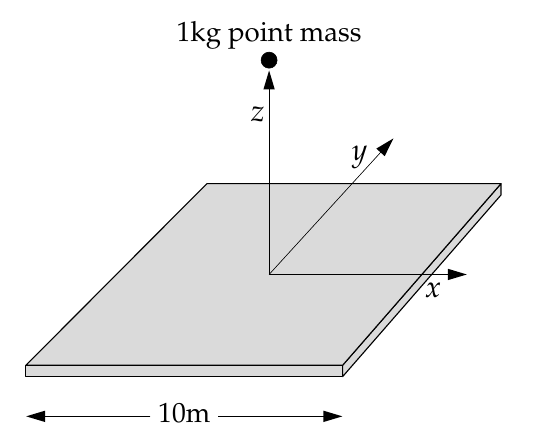

La lámina cuadrada tiene 10 m de lado y espesor despreciable. La componente de la fuerza gravitacional a lo largo del eje $z$ sobre una masa de prueba de 1 kg ubicada a distancia $z$ del centro de la lámina es:

$$F_z = G\sigma z \iint_{-L/2}^{L/2} \frac{dx \, dy}{(x^2 + y^2 + z^2)^{3/2}}$$

donde $G = 6.674 \times 10^{-11} \, \text{m}^3 \, \text{kg}^{-1} \, \text{s}^{-2}$, $\sigma = \frac{M}{L^2}$, $L = 10$ m y $M = 10,000$ kg.

- Calcular numéricamente esta integral doble.
- Graficar $F_z$ como función de $z$ desde $z=0$ hasta $z=10$ m


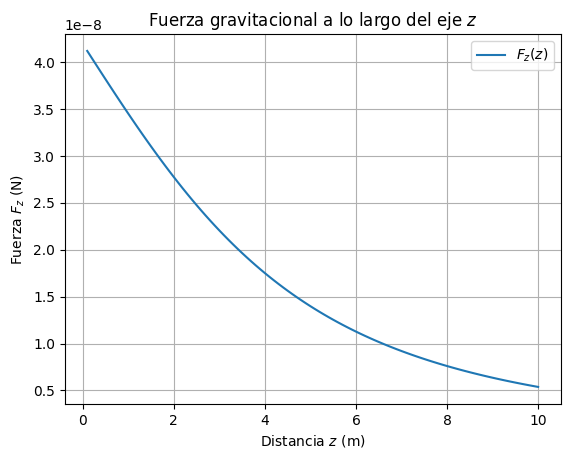

In [ ]:
import numpy as np
from scipy.integrate import dblquad

# Parámetros
L = 10.0           # Lado de la lámina (m)
M = 10000.0        # Masa de la lámina (kg)
sigma = M / L**2   # Densidad superficial (kg/m²)
G = 6.674e-11      # Constante gravitacional (m³ kg⁻¹ s⁻²)

# Función integrando
def integrando(y, x, z):
    return (x**2 + y**2 + z**2)**(-3/2)

# Rango de z para evaluar F_z
z_values = np.linspace(0.1, 10, 100)  # Evitar z=0 por división entre cero
F_z_values = []

for z in z_values:
    # Límites de integración: -L/2 a L/2 en x e y
    resultado, _ = dblquad(integrando, -L/2, L/2, -L/2, L/2, args=(z,))
    F_z = G * sigma * z * resultado
    F_z_values.append(F_z)

# Graficar F_z vs z
import matplotlib.pyplot as plt

plt.plot(z_values, F_z_values, label='$F_z(z)$')
plt.xlabel('Distancia $z$ (m)')
plt.ylabel('Fuerza $F_z$ (N)')
plt.title('Fuerza gravitacional a lo largo del eje $z$')
plt.grid(True)
plt.legend()
plt.show()